# DBSCAN Clustering (scikit-learn)
### CMPE 255 — Data Mining  

In this notebook, I will:

- Explain the intuition behind **DBSCAN**
- Use `DBSCAN` from `sklearn.cluster`
- Visualize clusters and noise points
- Compute clustering quality metrics
- Compare DBSCAN with **K-Means** on a non-spherical dataset



## 1. Theory: What is DBSCAN?

DBSCAN = **Density-Based Spatial Clustering of Applications with Noise**

It groups together points that are **closely packed** (high density regions) and marks points in low-density regions as **noise** (outliers).

### Key parameters
- **eps**: radius of the neighborhood around a point  
- **min_samples**: minimum number of points required to form a dense region  

### Types of points
- **Core point**: has at least `min_samples` points within distance `eps`  
- **Border point**: not a core point, but within `eps` of a core point  
- **Noise point (outlier)**: neither core nor border  

### Why DBSCAN?
- Does **not** require number of clusters as input  
- Can find **arbitrarily-shaped clusters** (e.g., moons, rings)  
- Can detect **outliers** naturally (labelled as -1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

plt.rcParams["figure.figsize"] = (6, 5)


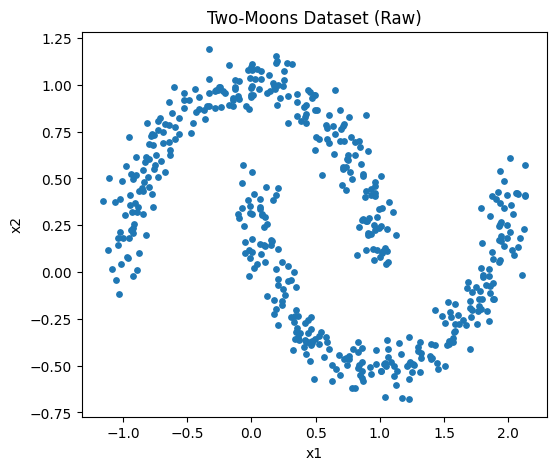

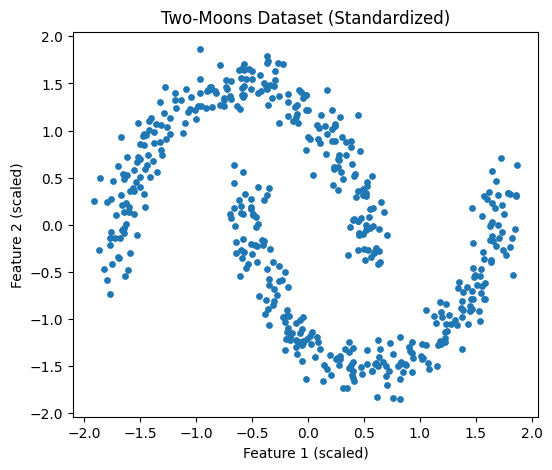

In [ ]:
# Two-moons dataset (good for DBSCAN)
X, y_true = make_moons(n_samples=500, noise=0.08, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Two-Moons Dataset (Raw)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Scale the data for DBSCAN (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=15)
plt.title("Two-Moons Dataset (Standardized)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [ ]:
dbscan = DBSCAN(
    eps=0.3,
    min_samples=5,
    metric="euclidean"
)

labels_db = dbscan.fit_predict(X_scaled)
unique_labels = np.unique(labels_db)
print("Unique cluster labels:", unique_labels)


Unique cluster labels: [0 1]


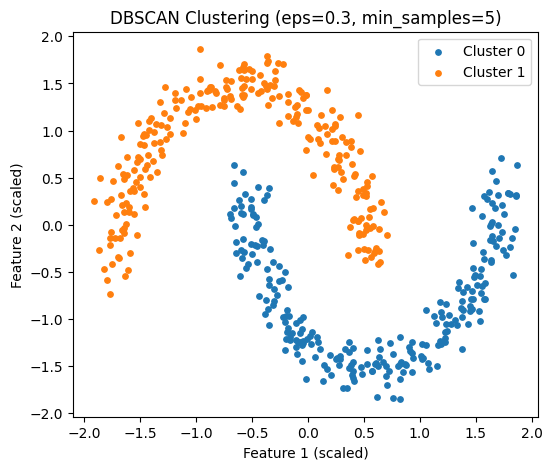

In [ ]:
# Plot DBSCAN clusters
plt.figure(figsize=(6, 5))

# Different colors for each cluster, noise in black
for lab in unique_labels:
    mask = labels_db == lab
    if lab == -1:
        # Noise
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1],
                    s=15, c="black", label="Noise (-1)")
    else:
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1],
                    s=15, label=f"Cluster {lab}")

plt.title("DBSCAN Clustering (eps=0.3, min_samples=5)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()


In [ ]:
# Filter out noise points for metric computation
mask_non_noise = labels_db != -1
X_non_noise = X_scaled[mask_non_noise]
labels_non_noise = labels_db[mask_non_noise]

print("Number of points (total):", len(X_scaled))
print("Number of non-noise points:", len(X_non_noise))

if len(np.unique(labels_non_noise)) > 1:
    sil_db = silhouette_score(X_non_noise, labels_non_noise)
    dbi_db = davies_bouldin_score(X_non_noise, labels_non_noise)
    ch_db = calinski_harabasz_score(X_non_noise, labels_non_noise)

    print("\n📌 DBSCAN Clustering Metrics (excluding noise):")
    print(f"Silhouette Score       : {sil_db:.4f}")
    print(f"Davies–Bouldin Index   : {dbi_db:.4f}")
    print(f"Calinski–Harabasz Score: {ch_db:.4f}")
else:
    print("\nNot enough clusters (excluding noise) to compute metrics.")


Number of points (total): 500
Number of non-noise points: 500

📌 DBSCAN Clustering Metrics (excluding noise):
Silhouette Score       : 0.3836
Davies–Bouldin Index   : 1.0241
Calinski–Harabasz Score: 430.8867


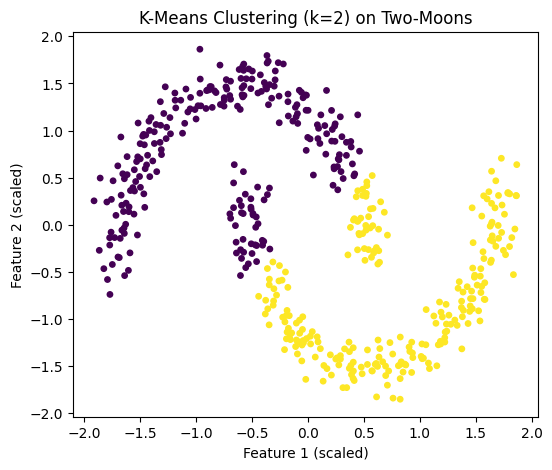

📌 K-Means Metrics:
Silhouette Score       : 0.4932
Davies–Bouldin Index   : 0.8132
Calinski–Harabasz Score: 690.2079


In [ ]:
# Choose k=2 since we know there are 2 moons
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
labels_km = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_km, s=15, cmap="viridis")
plt.title("K-Means Clustering (k=2) on Two-Moons")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

sil_km = silhouette_score(X_scaled, labels_km)
dbi_km = davies_bouldin_score(X_scaled, labels_km)
ch_km = calinski_harabasz_score(X_scaled, labels_km)

print("📌 K-Means Metrics:")
print(f"Silhouette Score       : {sil_km:.4f}")
print(f"Davies–Bouldin Index   : {dbi_km:.4f}")
print(f"Calinski–Harabasz Score: {ch_km:.4f}")


## Conclusions

- I used **DBSCAN** from `sklearn.cluster` on a non-spherical two-moons dataset.
- DBSCAN:
  - Found clusters based on **density**, not centroids.
  - Automatically detected **noise points** (label -1).
- I computed clustering quality metrics (Silhouette, Davies–Bouldin, Calinski–Harabasz) on non-noise points.
- I compared DBSCAN with **K-Means** on the same dataset:
  - K-Means could not capture the moon-shaped clusters well, because it assumes spherical clusters.
  - DBSCAN handled the non-linear cluster structure better.

> **Note on PyCaret**:  
> In the current Google Colab environment, Python version is 3.12, but PyCaret only supports Python 3.9–3.11. Therefore, PyCaret cannot be imported, and I used scikit-learn’s DBSCAN implementation instead, which is the underlying algorithm that PyCaret wraps.
